In [ ]:
# install truetype fonts => arabic fonts
! apt-get install fonts-noto

# upgrade PIL to version 9.3
# ⚠️⚠️⚠️ after this cell, restart runtime to be able to use PIL 9.3 ⚠️⚠️⚠️
! pip install Pillow --upgrade

In [2]:
from PIL import Image, ImageFont, ImageDraw
import matplotlib.pyplot as plt
import requests
import warnings, os

warnings.filterwarnings("ignore", category = DeprecationWarning)

'\nimport arabic_reshaper\nfrom bidi.algorithm import get_display\n'

(-0.5, 735.5, 735.5, -0.5)

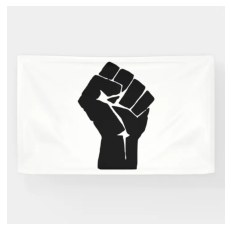

In [67]:
url = "https://rlv.zcache.com/black_fist_raised_resistance_protest_banner-r7c768eacd5cd4bc9815143f6f8772d7e_jj7hi_736.webp"

# if a url is not given, a blank image will be used
if url == None:
    # create a blank (white) image ; 1920 x 1080
    imageWidth, imageHeight = 1080, 1920
    image = Image.new("RGB", (imageWidth, imageHeight), color = "white")
else:
    # open image in URL
    image = Image.open(requests.get(url, stream = True).raw)
    imageWidth, imageHeight = image.width, image.height

# show the image
plt.imshow(image)
plt.axis("off")

In [68]:
# texts to put on the image
title = "فراخوان سراسری"
subtitle = "برای کردستان"
date_time = "پنجشنبه ۳ آذر ۱۴۰۱"
motto = "زن، زندگی، آزادی"

# merge all into a list
texts = [title, subtitle, date_time, motto]

### config
# text alignment: `True` for center, `False` for right
centerize = True

# font size to use
baseFontSize = 60

# `True` for bounding-box around the text
isBbox = True

# text color
textColor = "red"

# bounding-box color
boxColor = "black"

# text offset from the right (if not centerized)
offsetX = imageWidth // 20

# text offset from the top
offsetY = imageWidth // 10

# distance between each text line
dY = imageHeight//4

(-0.5, 735.5, 735.5, -0.5)

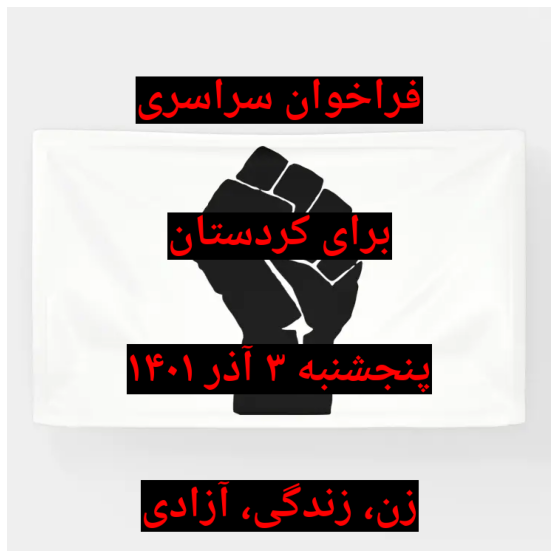

In [69]:
draw = ImageDraw.Draw(image) 
for i, text in enumerate(texts):
    textWidth = imageWidth
    fontSize = baseFontSize
    # check if the text is not bigger than the image width
    # if so, decrease the font size
    while (imageWidth - textWidth) < 100:
        font = ImageFont.truetype('NotoNaskhArabic-Bold.ttf', fontSize, encoding='unic')
        textWidth, textHeight = font.getsize_multiline(text)
        fontSize -= 1
    # text position if centerized
    if centerize:
        px = imageWidth//2 - textWidth//2
    else:
    # text position if right-aligned
        px = imageWidth - textWidth - offsetX
    # horizontal distance
    py = offsetY + dY * i
    # bounding box
    if isBbox:
        bbox = draw.textbbox((px, py), text, font = font)
        draw.rectangle(bbox, fill = boxColor)
    # write text
    draw.text((px, py), text, font=font, fill = textColor)

# show the results
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")